<a href="https://colab.research.google.com/github/PAminai/fNIRS_Motor_Imaginery/blob/main/Time_Frequency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/fNIRs Competition 2022/Dataset

/content/drive/.shortcut-targets-by-id/1avZwjuTnjnFNhOKSeF5Bor3jxrHOgWqi/fNIRS Competition 2022/Dataset


In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import statistics 

In [ ]:
import scipy.io
mat = scipy.io.loadmat('sub01_Competition.mat')

In [ ]:
DataTrain_Hb=mat.get('DataTrain_Hb')
ClassLabel_Train=mat.get("ClassLabel_Train")

In [ ]:
# Channel number= 5

a1=DataTrain_Hb[:,2,1] 
a1_Label=ClassLabel_Train[0][0]
print('trial #1 label =',a1_Label)

a2=DataTrain_Hb[:,2,2]
a2_Label=ClassLabel_Train[0][1]
print('trial #2 label =',a2_Label)

a5=DataTrain_Hb[:,2,5]
a5_Label=ClassLabel_Train[0][4]
print('trial #5 label =', a5_Label)

trial #1 label = 1
trial #2 label = 1
trial #5 label = 2


## **Time-Series Representation:**



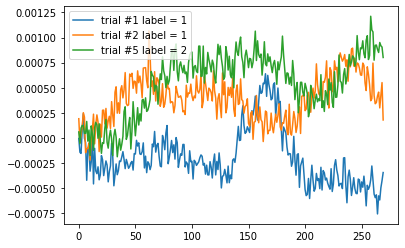

In [ ]:
plt.plot(a1)
plt.plot(a2)
plt.plot(a5)

plt.legend(['trial #1 label = 1','trial #2 label = 1','trial #5 label = 2'])



# **Time-Series Correlations**

*   Different Labes: Corr(trial#1, trial#5)
*   The same Labes: Corr(trial#1, trial#2)



In [ ]:
from scipy.stats import pearsonr


# Different Labes:
corr, _ = pearsonr(a1, a5)
print('Correlation(trial#1, trial#5)= %.3f' % corr)
corr, _ = pearsonr(a2, a5)
print('Correlation(trial#2, trial#5)= %.3f' % corr)


# The Same Labes:
corr, _ = pearsonr(a1, a2)
print('Correlation(trial#1, trial#2)= %.3f' % corr)

Correlation(trial#1, trial#5)= 0.133
Correlation(trial#2, trial#5)= 0.196
Correlation(trial#1, trial#2)= -0.408


# **Frequency Analysis:**

In [ ]:
from scipy.fft import fft, ifft

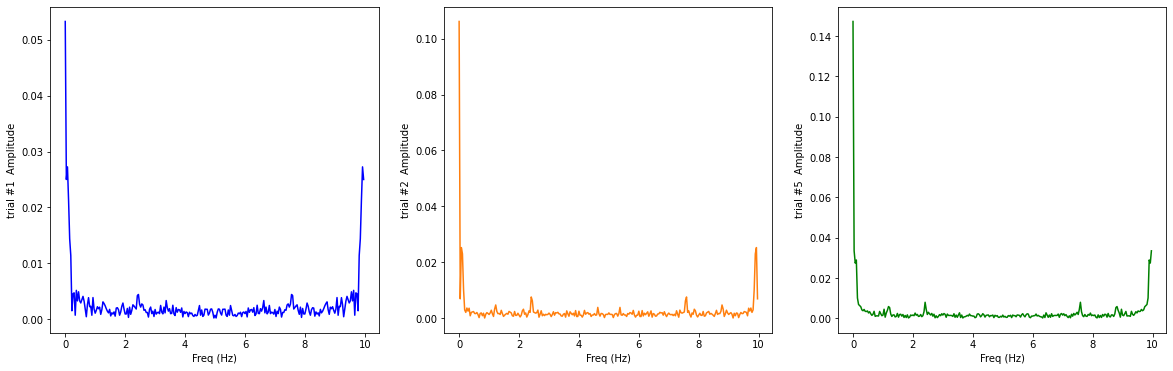

In [ ]:
# sampling rate
sr = 10

A1=fft(a1)
A2=fft(a2)
A5=fft(a5)


N = len(A1)
n = np.arange(N)
T = N/sr
freq = n/T 


plt.figure(figsize = (20, 6))


plt.subplot(131)
plt.plot(freq, np.abs(A1),'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('trial #1  Amplitude')


plt.subplot(132)
plt.plot(freq, np.abs(A2),'tab:orange')
plt.xlabel('Freq (Hz)')
plt.ylabel('trial #2  Amplitude')


plt.subplot(133)
plt.plot(freq, np.abs(A5),'g')
plt.xlabel('Freq (Hz)')
plt.ylabel('trial #5  Amplitude')

plt.show()

In [ ]:
#Frequency-Domain Correlation
from scipy.stats import pearsonr


# Different Labes:
corr, _ = pearsonr(A1, A5)
print('Correlation(trial#1, trial#5)= %.3f' % corr)
corr, _ = pearsonr(A2, A5)
print('Correlation(trial#2, trial#5)= %.3f' % corr)


# The Same Labes:
corr, _ = pearsonr(A1, A2)
print('Correlation(trial#1, trial#2)= %.3f' % corr)

Correlation(trial#1, trial#5)= -0.340
Correlation(trial#2, trial#5)= 0.598
Correlation(trial#1, trial#2)= -0.492


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3555: ComplexWarning: Casting complex values to real discards the imaginary part
  prob = 2*special.btdtr(ab, ab, 0.5*(1 - abs(np.float64(r))))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


# **Mean Calculation**

In [ ]:
from statistics import mean

def Average(l): 
    avg = mean(l) 
    return avg

MeanData=np.empty((270, 33))

for j in range(1, 33):
  for i in range(1, 270):
    mean_val=mean(DataTrain_Hb[i,j,:])
    MeanData[i][j]=mean_val
  

In [ ]:
# Task - Rest
MeanData_task=MeanData[120:220,:]-MeanData[20:120,:]

# **Time-Frequency Plot**

In [ ]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (20, 20))

num_ch=33;

for i in range(1,10):
    x= MeanData_task[:,i]
    num=str(num_ch)+str(i);
    num=int(num);
    plt.subplot(num)
    plt.specgram(x, Fs=10, NFFT=20, noverlap=15);
    plt.ylabel('Freq (Hz)')
    xlabel='time/ Channel #'+str(i)
    plt.xlabel(xlabel)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=100).
  # Remove the CWD from sys.path while we load stuff.


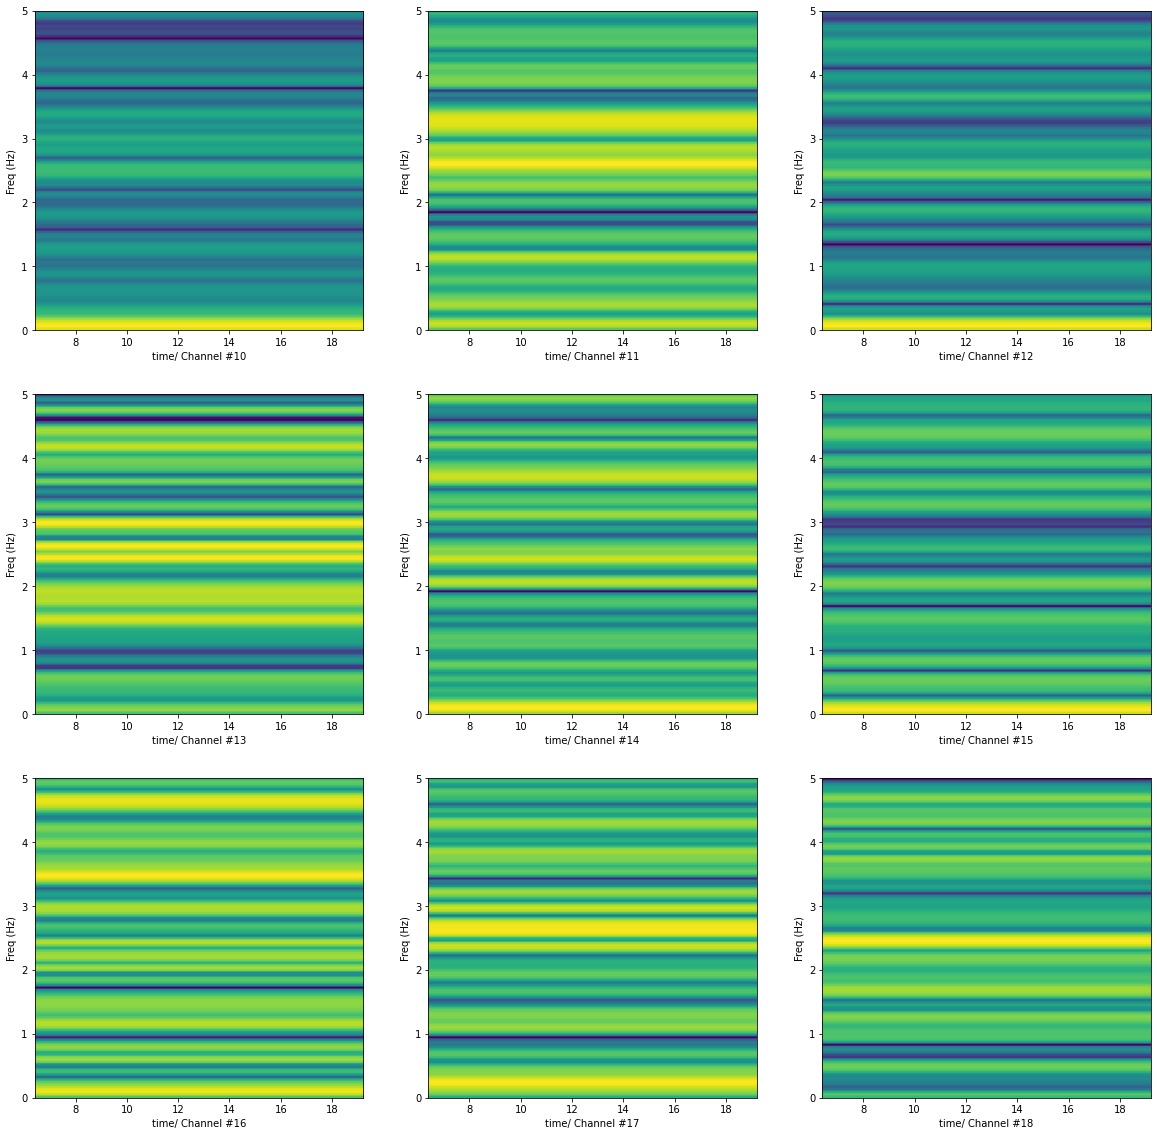

In [ ]:
plt.figure(figsize = (20, 20))

num_ch=33;

for i in range(1,10):
    x= MeanData_task[:,i+9]
    num=str(num_ch)+str(i);
    num=int(num);
    plt.subplot(num)
    plt.specgram(x, Fs=10);
    plt.ylabel('Freq (Hz)')
    xlabel='time/ Channel #'+str(i+9)
    plt.xlabel(xlabel)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=100).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=100).
  if __name__ == '__main__':


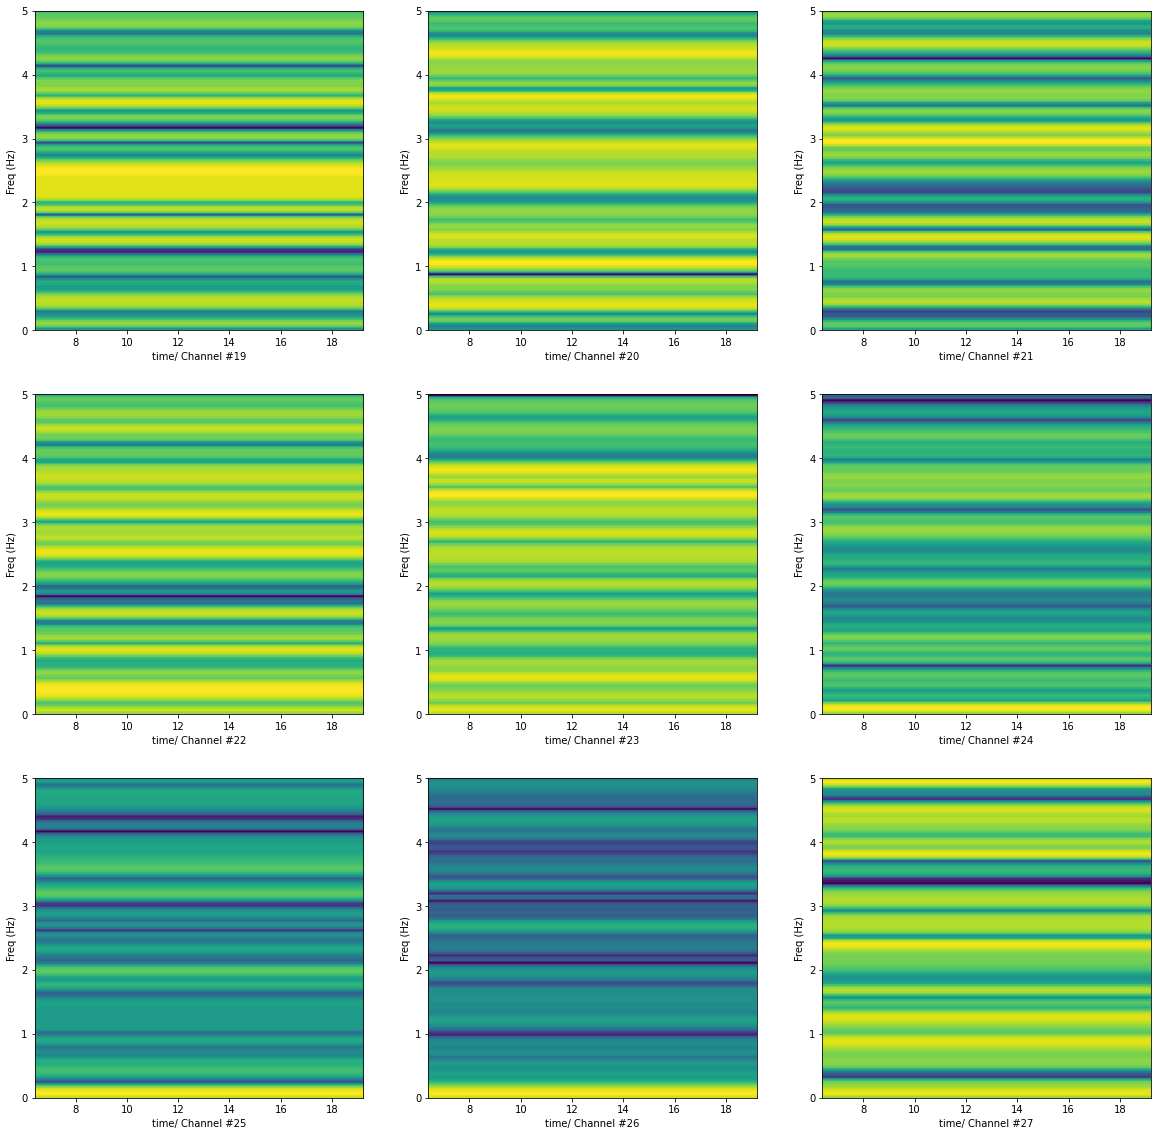

In [ ]:
plt.figure(figsize = (20, 20))

num_ch=33;

for i in range(1,10):
    x= MeanData_task[:,i+18]
    num=str(num_ch)+str(i);
    num=int(num);
    plt.subplot(num)
    plt.specgram(x, Fs=10);
    plt.ylabel('Freq (Hz)')
    xlabel='time/ Channel #'+str(i+18)
    plt.xlabel(xlabel)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=100).
  # Remove the CWD from sys.path while we load stuff.


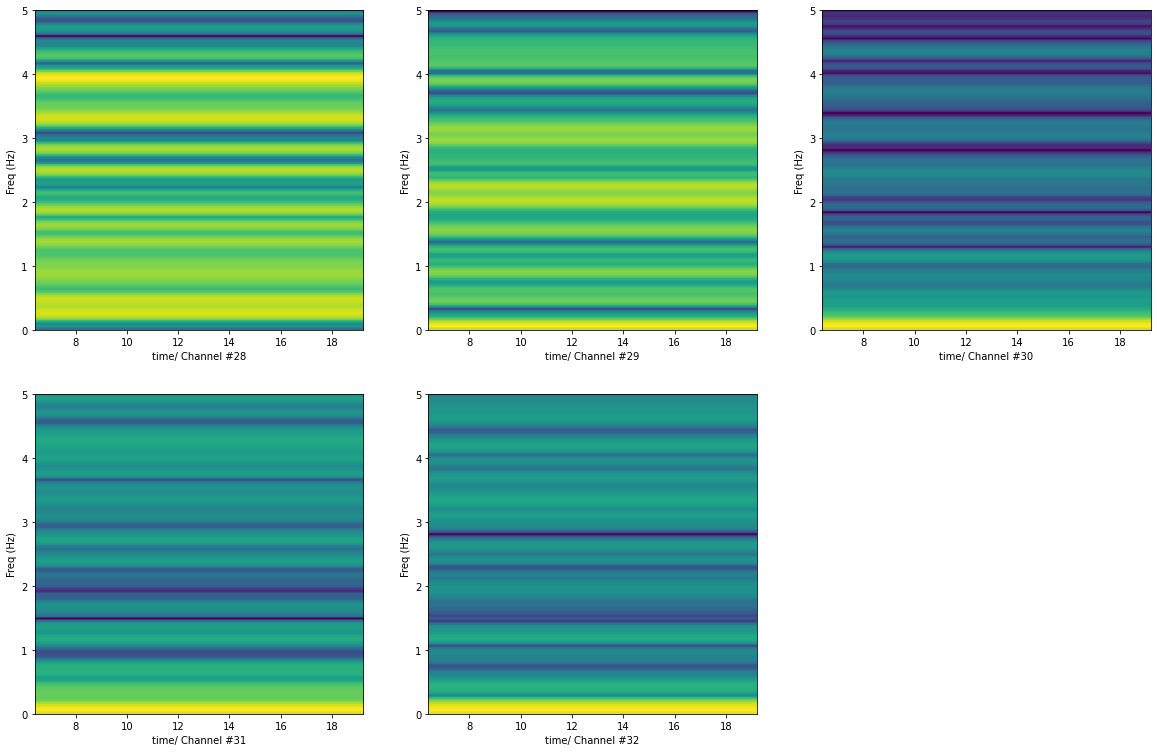

In [ ]:
plt.figure(figsize = (20, 20))

num_ch=33;

for i in range(1,6):
    x= MeanData_task[:,i+27]
    num=str(num_ch)+str(i);
    num=int(num);
    plt.subplot(num)
    plt.specgram(x, Fs=10);
    plt.ylabel('Freq (Hz)')
    xlabel='time/ Channel #'+str(i+27)
    plt.xlabel(xlabel)






In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.model_selection import train_test_split
import scipy.io